<a href="https://colab.research.google.com/github/Akashmadasu1/Machine_Learning_Projects/blob/main/Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Predict Student Marks Based on Study Hours

Goal: Predict a student’s marks based on hours studied.

by using :- Linear Regression (Supervised Learning)

Step 1: Import Required Libraries

💡 Explanation:

| Line                             | Purpose                                      |
| -------------------------------- | -------------------------------------------- |
| `pandas`                         | To load and explore the dataset              |
| `matplotlib`                     | To create graphs                             |
| `train_test_split`               | To split your data into training and testing |
| `LinearRegression`               | The main ML model we’ll use                  |
| `mean_squared_error`, `r2_score` | To measure how good your predictions are     |


In [ ]:
# Import basic libraries
import pandas as pd                  # For data handling
import matplotlib.pyplot as plt      # For plotting
from sklearn.model_selection import train_test_split  # To split data
from sklearn.linear_model import LinearRegression      # To build the model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation


Step 2: Load Dataset from a CSV File


💡 What this does:
Loads the dataset directly from GitHub (you don’t have to upload manually)

Shows the first 5 rows using df.head()

In [ ]:
# Load CSV dataset (you can also upload your file if needed)
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

# Show first few rows
df.head()


 Step 3: Visualize the Data

Let’s draw a scatter plot to see the relationship between Hours Studied and Scores.

💡 What this does:

| Code                        | Explanation                            |
| --------------------------- | -------------------------------------- |
| `plt.scatter(...)`          | Plots the actual data points           |
| `title()`, `xlabel()`, etc. | Adds labels to make the graph readable |
| `show()`                    | Displays the graph                     |


You should see a graph with dots going upward → meaning:
➡️ More hours studied = higher score

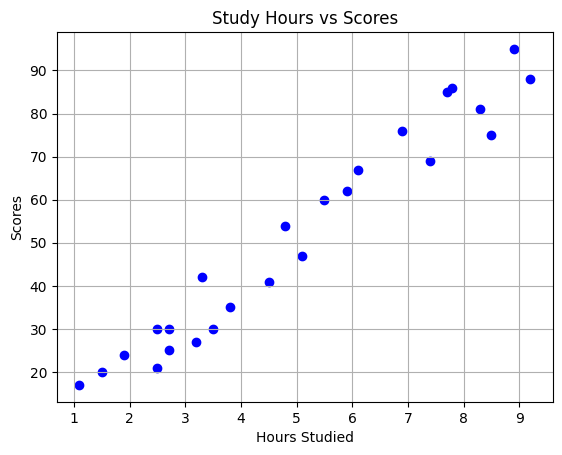

In [ ]:
# Visualize the data
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Study Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


✅ Step 4: Split the Data into Training and Test Sets

📌 Why?
We split the data so that:

The model learns from the training set

Then we test its performance on unseen data (test set)

💡 Explanation:

| Line                    | What it Does                                   |
| ----------------------- | ---------------------------------------------- |
| `X = df[['Hours']]`     | Extracts the input feature (must be 2D format) |
| `y = df['Scores']`      | Extracts the output variable (target)          |
| `train_test_split(...)` | Randomly splits your data into train/test sets |
| `test_size=0.2`         | Keeps 20% for testing, 80% for training        |
| `random_state=42`       | Ensures results are reproducible               |


In [ ]:
# Split the data into input (X) and output (y)
X = df[['Hours']]  # Input should be 2D
y = df['Scores']   # Output can be 1D

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of data
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (20, 1)
Testing Set: (5, 1)


✅ Step 5: Train the Linear Regression Model

We’ll now fit the model to your training data so it learns the relationship between Hours and Scores.

🧠 What Does "Training" Mean Here?
Training = Finding the best-fit line:

y
^
​
 =wX+b


scikit-learn will calculate the best values of w (slope) and b (intercept) for you.

🧠 Formula:

y^​=wX+b

🔤 This is read as:

"y hat equals w times X plus b"

🧩 What Does Each Symbol Mean?

| Symbol      | Meaning                                   | Example (Student Marks)              |
| ----------- | ----------------------------------------- | ------------------------------------ |
| `ŷ` (y hat) | **Predicted output** (your model's guess) | Predicted marks of a student         |
| `X`         | **Input feature** (independent variable)  | Hours studied                        |
| `w`         | **Weight** or **Slope** of the line       | Score increase per 1 hour studied    |
| `b`         | **Bias** or **Intercept** (y when X = 0)  | Predicted score for 0 hours of study |


🧮 Example:

Suppose your model learned:

w = 9.71

b = 2.83

Then your prediction formula becomes:

y^ = 9.71⋅X + 2.83

Now, if a student studied X = 5 hours:

y^ = 9.71×5 + 2.83 = 48.55 + 2.83 = 51.38

✅ The model predicts the student will score 51.38 marks

🎯 Purpose of this Formula:

To let your machine predict future values of y for any given X.

It’s like telling the computer:

“Here’s how marks increase with hours — now guess the marks for 6 hours, 7 hours, etc.”

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

💡 Explanation:

| Code                    | What it Does                                               |
| ----------------------- | ---------------------------------------------------------- |
| `LinearRegression()`    | Creates the model object                                   |
| `fit(X_train, y_train)` | Trains the model to find the best line using training data |


✅ You can now check the learned parameters:

In [ ]:
print("Slope (w):", model.coef_[0])
print("Intercept (b):", model.intercept_)


Slope (w): 9.682078154455697
Intercept (b): 2.826892353899737


🔍 Explanation:
1️⃣ model.coef_

1.This gives you the slope (w) of the line.

2.It means: For every 1 hour increase in study time, how much will the score increase?

3.The output is in a list/array format, so we use [0] to get the actual number.

Example:

model.coef_ → [9.71]

model.coef_[0] → 9.71

So:

Score increase per hour
≈
9.71
Score increase per hour≈9.71


2️⃣ model.intercept_
This gives you the intercept (b) of the line.

It means: What would the predicted score be if the student studied 0 hours?

Example:

model.intercept_ → 2.83

So:

Predicted Score at 0 hours
≈
2.83
Predicted Score at 0 hours≈2.83

✅ Together, your model is now:


Predicted Score=9.71×Hours Studied+2.83

This is the final line your model will use to make predictions!

✅ Step 6: Visualize the Best-Fit Line (Prediction Line)

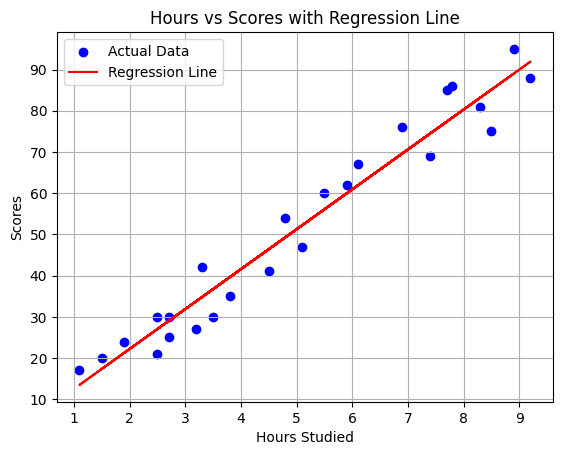

In [ ]:
# Plot original data points (blue)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot regression line (red)
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Add labels and grid
plt.title('Hours vs Scores with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


💡 Explanation:

| Code               | What it does                                |
| ------------------ | ------------------------------------------- |
| `plt.scatter(...)` | Plots the original data points              |
| `model.predict(X)` | Calculates predicted scores for all X       |
| `plt.plot(...)`    | Draws the regression line using predictions |
| `legend()`         | Adds labels for clarity                     |


✅ What You’ll See:

🔵 Blue dots = Actual data (Hours vs Scores)

🔴 Red line = Best-fit line predicted by your model

This is the visual proof that your model has learned how scores change with hours studied.

✅ Step 7: Make Predictions with Custom Input

Let’s say you want to predict the marks for a student who studies 6.5 hours.



In [ ]:
import pandas as pd

# Create a DataFrame with same feature name
hours_df = pd.DataFrame([[6.5]], columns=['Hours'])
predicted_score = model.predict(hours_df)

print(f"If a student studies for 6.5 hours, they are likely to score {predicted_score[0]:.2f} marks.")


If a student studies for 6.5 hours, they are likely to score 65.76 marks.


💡 Explanation:

| Code                     | What It Does                                                    |
| ------------------------ | --------------------------------------------------------------- |
| `model.predict([[6.5]])` | Predicts output using the formula `ŷ = wX + b`                  |
| `predicted_score[0]`     | Gets the predicted value from the result (which is in an array) |
| `:.2f`                   | Formats the result to 2 decimal places                          |


Boom! 💥

You’ve now built a complete Linear Regression model with real prediction power!

✅ Step 8: Model Evaluation (MSE & R²)

We’ll evaluate the model on the test data (the part the model didn’t see during training) using:

📏 1. Mean Squared Error (MSE)
Measures average squared difference between actual and predicted values

Lower = Better

📈 2. R² Score (Coefficient of Determination)
Measures how well the model explains the variance in the data

Ranges from 0 (bad) to 1 (perfect)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 18.94
R² Score: 0.97


✅ Interpretation:

| Metric | Good Value  | Meaning                                        |
| ------ | ----------- | ---------------------------------------------- |
| MSE    | Closer to 0 | Lower error between predicted and actual marks |
| R²     | Closer to 1 | Model explains most of the data variation      |

So if your R² score is around 0.90, your model is doing great! 🎯


📊 Your Model Evaluation:

| Metric       | Value   | Interpretation                                                                                                            |
| ------------ | ------- | ------------------------------------------------------------------------------------------------------------------------- |
| **MSE**      | `18.94` | Very low error — predictions are very close to actual scores                                                              |
| **R² Score** | `0.97`  | 🚀 Your model explains **97%** of the variation in student scores based on hours studied — that’s **extremely accurate**! |


✅ What This Means:
Your Linear Regression model is working very well on this dataset.

It can confidently predict scores from hours studied.

You’ve now completed a real ML project — with:

📥 Data Loading

📈 Visualization

🧠 Model Training

🔍 Evaluation

🎯 Custom Predictions

✅ Step 9: Save Your Model (Using joblib)

We’ll save the trained model so you can reuse it later without retraining.

🔧 Install joblib (if not already installed)

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Save the model
joblib.dump(model, "student_score_predictor.pkl")
print("Model saved as student_score_predictor.pkl")


Model saved as student_score_predictor.pkl


✅ This creates a file called student_score_predictor.pkl — you can download it and reuse later.

🔁 Load the Saved Model Anytime

In [ ]:
import pandas as pd

# Load the model later
loaded_model = joblib.load("student_score_predictor.pkl")

# Use the loaded model to predict
# Predict using a DataFrame with same column name
hours_df = pd.DataFrame([[6.5]], columns=['Hours'])
predicted_score = loaded_model.predict(hours_df)

print(f"If a student studies for 6.5 hours, they are likely to score {predicted_score[0]:.2f} marks.")



If a student studies for 6.5 hours, they are likely to score 65.76 marks.


✅ **Step 10**: Export the Colab Notebook

To download your full project:

On top-left of Google Colab → Click File

Select Download > Download .ipynb

This downloads your full notebook as: Linear_Regression_Student_Marks.ipynb

You can share or reopen this anytime.

README.md

## 📊 Student Marks Prediction using Linear Regression

This is a simple Machine Learning project that uses **Linear Regression** to predict student marks based on the number of hours they studied.

---

## 📁 Dataset

- Dataset: `student_scores.csv`
- Columns:
  - `Hours`: Number of hours studied
  - `Scores`: Marks scored by the student

---

## 🎯 Objective

To build a model that can:
- Learn the relationship between hours studied and marks scored.
- Predict the score of a student based on the number of study hours.

---

## 🔧 Technologies Used

- Python 🐍
- Google Colab ☁️
- Pandas 🐼
- Matplotlib 📊
- scikit-learn ⚙️
- Joblib (for saving the model)

---

## 🧠 Steps Involved

1. Imported required libraries
2. Loaded the dataset
3. Visualized the data
4. Split the dataset into training and testing sets
5. Trained a **Linear Regression** model
6. Plotted the best-fit regression line
7. Evaluated the model using:
   - Mean Squared Error (MSE)
   - R² Score
8. Predicted the score for custom input (e.g., 6.5 hours)
9. Saved the model for future use

---

## 🧪 Example Prediction

```python
If a student studies for 6.5 hours, they are likely to score: 65.76 marks


📦 Model Saved

student_score_predictor.pkl

📂 How to Run This Project

Clone or download this repository

Open the .ipynb file in Google Colab

Run each cell step by step

🙌 Author

Akash Madasu

Beginner ML Engineer 🚀 | Python Enthusiast 🐍

✅ Status
✅ Completed — Ready for use and improvement!